In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_tsla = yf.download(tickers='TSLA', start='2023-12-30', end='2024-1-29', interval='30m')
data_tsla

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-01-02 09:30:00,250.080002,250.899994,244.410004,248.794006,248.794006,22581347
2024-01-02 10:00:00,248.779999,251.250000,248.050003,249.610001,249.610001,13845933
2024-01-02 10:30:00,249.600006,249.638199,246.820007,248.919998,248.919998,10503013
2024-01-02 11:00:00,248.899994,250.259995,248.339996,250.000000,250.000000,6429840
2024-01-02 11:30:00,249.994095,251.000000,249.900101,250.475403,250.475403,6197232
...,...,...,...,...,...,...
2024-01-26 13:30:00,183.490097,183.630005,182.291000,182.644394,182.644394,5029161
2024-01-26 14:00:00,182.654999,182.660004,182.100006,182.280106,182.280106,3917711
2024-01-26 14:30:00,182.300003,183.380005,182.119995,183.270004,183.270004,4844718


In [3]:
#SMA
data_tsla['2_SMA'] = data_tsla['Close'].rolling(window=2).mean() #trung binh cua 2 gtri lien tiep
data_tsla['5_SMA'] = data_tsla['Close'].rolling(window=5).mean() #trung binh cua 5 gtri lien tiep

data_tsla = data_tsla[data_tsla['5_SMA'].notna()]
data_tsla

,Open,High,Low,Close,Adj Close,Volume,2_SMA,5_SMA
Datetime,,,,,,,,
2024-01-02 11:30:00,249.994095,251.000000,249.900101,250.475403,250.475403,6197232,250.237701,249.559882
2024-01-02 12:00:00,250.449997,250.660004,247.941696,248.350006,248.350006,5924493,249.412704,249.471082
2024-01-02 12:30:00,248.354996,249.132996,247.490005,247.581406,247.581406,4590789,247.965706,249.065363
2024-01-02 13:00:00,247.583801,248.720001,247.000000,248.351700,248.351700,4709374,247.966553,248.951703
2024-01-02 13:30:00,248.389999,249.380005,247.949997,248.248398,248.248398,4269095,248.300049,248.601382
...,...,...,...,...,...,...,...,...
2024-01-26 13:30:00,183.490097,183.630005,182.291000,182.644394,182.644394,5029161,183.062195,183.716278
2024-01-26 14:00:00,182.654999,182.660004,182.100006,182.280106,182.280106,3917711,182.462250,183.252100
2024-01-26 14:30:00,182.300003,183.380005,182.119995,183.270004,183.270004,4844718,182.775055,183.085101


In [4]:
# SMA trade calls
Trade_Buy=[]
Trade_Sell=[]
for i in range(len(data_tsla)-1):
    if ((data_tsla['2_SMA'].values[i] < data_tsla['5_SMA'].values[i]) & (data_tsla['2_SMA'].values[i+1] > data_tsla['5_SMA'].values[i+1])):
        print("Trade Call for {row} is Buy.".format(row=data_tsla.index[i].date()))
        Trade_Buy.append(i)
    elif ((data_tsla['2_SMA'].values[i] > data_tsla['5_SMA'].values[i]) & (data_tsla['2_SMA'].values[i+1] < data_tsla['5_SMA'].values[i+1])):
        print("Trade Call for {row} is Sell.".format(row=data_tsla.index[i].date()))
        Trade_Sell.append(i)

print(Trade_Buy)
print(Trade_Sell)

Trade Call for 2024-01-02 is Sell.
Trade Call for 2024-01-02 is Buy.
Trade Call for 2024-01-02 is Sell.
Trade Call for 2024-01-03 is Buy.
Trade Call for 2024-01-03 is Sell.
Trade Call for 2024-01-03 is Buy.
Trade Call for 2024-01-03 is Sell.
Trade Call for 2024-01-04 is Buy.
Trade Call for 2024-01-04 is Sell.
Trade Call for 2024-01-04 is Buy.
Trade Call for 2024-01-04 is Sell.
Trade Call for 2024-01-05 is Buy.
Trade Call for 2024-01-05 is Sell.
Trade Call for 2024-01-05 is Buy.
Trade Call for 2024-01-05 is Sell.
Trade Call for 2024-01-05 is Buy.
Trade Call for 2024-01-08 is Sell.
Trade Call for 2024-01-08 is Buy.
Trade Call for 2024-01-08 is Sell.
Trade Call for 2024-01-09 is Buy.
Trade Call for 2024-01-09 is Sell.
Trade Call for 2024-01-09 is Buy.
Trade Call for 2024-01-09 is Sell.
Trade Call for 2024-01-10 is Buy.
Trade Call for 2024-01-10 is Sell.
Trade Call for 2024-01-11 is Buy.
Trade Call for 2024-01-11 is Sell.
Trade Call for 2024-01-12 is Buy.
Trade Call for 2024-01-12 is Sell.

In [6]:
with open('output.txt', 'w') as f:
    for i in range(len(data_tsla)-1):
        if ((data_tsla['2_SMA'].values[i] < data_tsla['5_SMA'].values[i]) & (data_tsla['2_SMA'].values[i+1] > data_tsla['5_SMA'].values[i+1])):
            f.write("Trade Call for {row} is Buy.\n".format(row=data_tsla.index[i].date()))
            Trade_Buy.append(i)
        elif ((data_tsla['2_SMA'].values[i] > data_tsla['5_SMA'].values[i]) & (data_tsla['2_SMA'].values[i+1] < data_tsla['5_SMA'].values[i+1])):
            f.write("Trade Call for {row} is Sell.\n".format(row=data_tsla.index[i].date()))

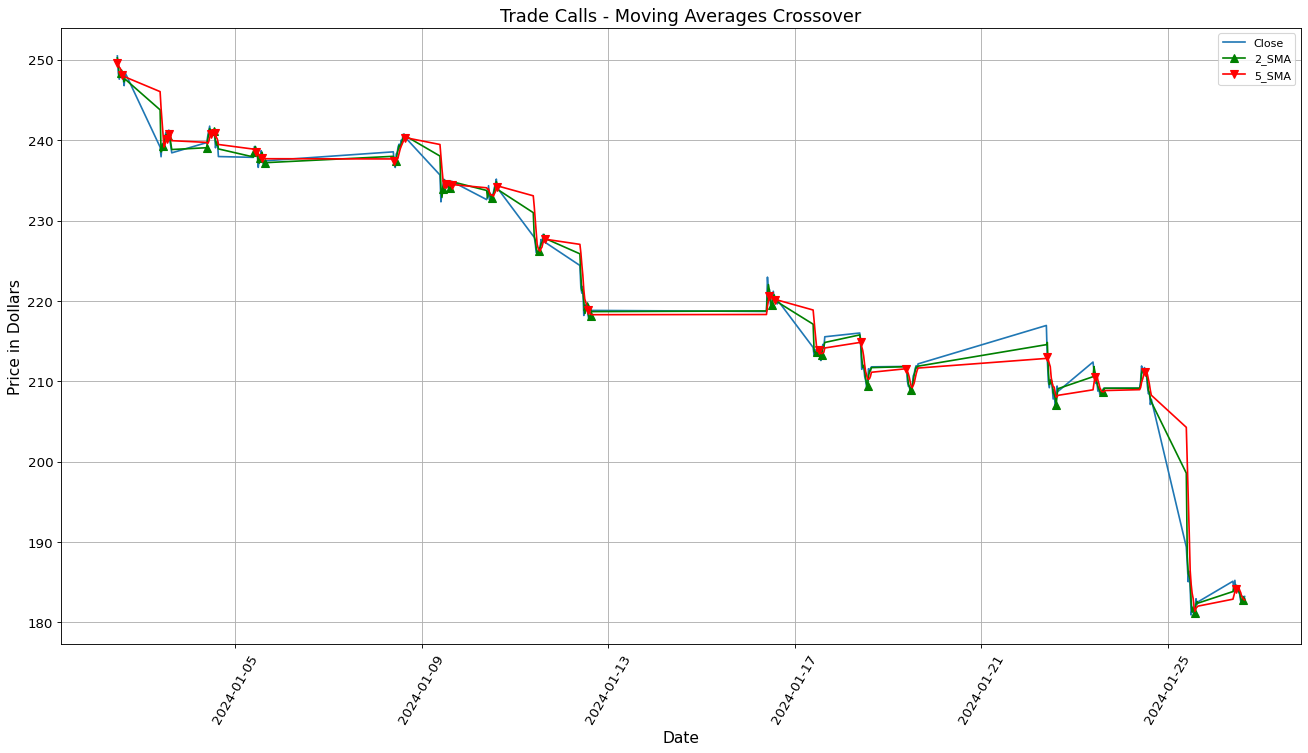

In [5]:
# Visualizing SMA trade calls
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['Close'])
plt.plot(data_tsla.index, data_tsla['2_SMA'],'-^', markevery=Trade_Buy, ms=7, color='green')
plt.plot(data_tsla.index, data_tsla['5_SMA'],'-v', markevery=Trade_Sell, ms=7, color='red')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - Moving Averages Crossover', fontsize = 16)
plt.legend(['Close','2_SMA','5_SMA'])
plt.grid()
plt.show() 